In [ ]:
import pandas as pd

# Define the path to the CSV file
csv_file_path = '/content/all_month.csv'

# Load the CSV file into a pandas DataFrame
try:
    df = pd.read_csv(csv_file_path)

    # Display the first few rows of the DataFrame
    print("DataFrame loaded successfully. Here are the first 5 rows:")
    display(df.head())

except FileNotFoundError:
    print(f"Error: The file '{csv_file_path}' was not found.")
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")

DataFrame loaded successfully. Here are the first 5 rows:


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-06-14T02:42:28.370Z,33.701833,-116.755833,14.99,0.74,ml,26.0,64.0,0.038610,0.15,...,2025-06-14T02:46:23.354Z,"5 km SW of Idyllwild, CA",earthquake,0.26,0.39,0.169,16.0,automatic,ci,ci
1,2025-06-14T02:38:45.120Z,38.837166,-122.791496,1.84,0.26,md,9.0,75.0,0.001533,0.01,...,2025-06-14T02:40:20.722Z,"6 km WNW of Cobb, CA",earthquake,0.55,1.41,0.190,10.0,automatic,nc,nc
2,2025-06-14T02:34:44.018Z,62.233400,-151.155500,81.50,1.40,ml,NaN,NaN,NaN,0.44,...,2025-06-14T02:37:09.897Z,"29 km NNE of Skwentna, Alaska",earthquake,NaN,0.70,NaN,NaN,automatic,ak,ak
3,2025-06-14T02:34:12.398Z,68.725400,-147.611100,0.00,1.50,ml,NaN,NaN,NaN,0.64,...,2025-06-14T02:36:00.155Z,"108 km NW of Arctic Village, Alaska",earthquake,NaN,0.40,NaN,NaN,automatic,ak,ak
4,2025-06-14T01:59:17.342Z,64.456100,-149.292300,7.50,1.30,ml,NaN,NaN,NaN,0.66,...,2025-06-14T02:01:44.251Z,"13 km NNW of Anderson, Alaska",earthquake,NaN,0.60,NaN,NaN,automatic,ak,ak


In [ ]:
# Get information about the DataFrame, including data types and non-null values
print("DataFrame Information:")
df.info()

# Get descriptive statistics for the numerical columns
print("\nDescriptive Statistics:")
display(df.describe())

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9602 entries, 0 to 9601
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9602 non-null   object 
 1   latitude         9602 non-null   float64
 2   longitude        9602 non-null   float64
 3   depth            9602 non-null   float64
 4   mag              9602 non-null   float64
 5   magType          9602 non-null   object 
 6   nst              8015 non-null   float64
 7   gap              8015 non-null   float64
 8   dmin             8013 non-null   float64
 9   rms              9602 non-null   float64
 10  net              9602 non-null   object 
 11  id               9602 non-null   object 
 12  updated          9602 non-null   object 
 13  place            9602 non-null   object 
 14  type             9602 non-null   object 
 15  horizontalError  7558 non-null   float64
 16  depthError       9583 non-null   floa

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,9602.000000,9602.000000,9602.000000,9602.000000,8015.000000,8015.000000,8013.000000,9602.000000,7558.000000,9583.000000,7993.000000,8014.000000
mean,39.722359,-112.374249,20.856445,1.519655,23.638178,110.813472,0.459808,0.266767,1.550545,2.172145,0.177202,19.742326
std,17.615527,66.098344,47.013903,1.240333,22.045885,64.685424,2.028768,0.269995,3.100123,5.145472,0.103740,33.496561
min,-63.573800,-179.989300,-3.470000,-1.580000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.680417,-151.024375,3.110000,0.740000,9.000000,65.000000,0.014620,0.090000,0.250000,0.440000,0.105000,7.000000
50%,38.820333,-121.756500,7.330300,1.380000,17.000000,90.000000,0.053760,0.160000,0.430000,0.720000,0.163000,12.000000
75%,51.908258,-113.890875,14.150000,2.000000,29.000000,142.000000,0.124000,0.390000,0.887950,1.620000,0.220000,22.000000
max,87.027900,179.962200,622.150000,6.500000,317.000000,359.000000,45.800000,2.300000,58.270000,160.500000,1.400000,892.000000


# Task
Load the data from "/content/all_month.csv", preprocess it, select features, split the data into training and testing sets, train a regression model to predict the 'mag' column, evaluate the model, and summarize the results.

## Data preprocessing

### Subtask:
Handle missing values, potentially convert categorical features, and select the features to use for the model.


**Reasoning**:
Identify columns with missing values and decide on a strategy for handling them. Based on the `df.info()` output, several columns have missing values. For numerical columns with missing values (`nst`, `gap`, `dmin`, `horizontalError`, `depthError`, `magError`, `magNst`), imputation with the median is a reasonable strategy to avoid being affected by outliers.



In [ ]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Impute missing numerical values with the median
numerical_cols_with_missing = ['nst', 'gap', 'dmin', 'horizontalError', 'depthError', 'magError', 'magNst']
for col in numerical_cols_with_missing:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values per column:
time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
dtype: int64

Missing values after imputation:
time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
d

**Reasoning**:
Identify and encode categorical features. Based on the `df.info()` output, `magType`, `net`, `id`, `updated`, `place`, `type`, `status`, `locationSource`, and `magSource` are object type columns. `id`, `updated`, and `place` are likely not useful features for predicting magnitude. `magType`, `net`, `type`, `status`, `locationSource`, and `magSource` are potential categorical features that need encoding. One-hot encoding is a suitable method for these.



In [ ]:
# Identify categorical columns to encode
categorical_cols = ['magType', 'net', 'type', 'status', 'locationSource', 'magSource']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded DataFrame
print("\nDataFrame after one-hot encoding:")
display(df_encoded.head())


DataFrame after one-hot encoding:


,time,latitude,longitude,depth,mag,nst,gap,dmin,rms,id,...,magSource_nc,magSource_nm,magSource_nn,magSource_ok,magSource_pr,magSource_se,magSource_tx,magSource_us,magSource_uu,magSource_uw
0,2025-06-14T02:42:28.370Z,33.701833,-116.755833,14.99,0.74,26.0,64.0,0.038610,0.15,ci40993735,...,False,False,False,False,False,False,False,False,False,False
1,2025-06-14T02:38:45.120Z,38.837166,-122.791496,1.84,0.26,9.0,75.0,0.001533,0.01,nc75195371,...,True,False,False,False,False,False,False,False,False,False
2,2025-06-14T02:34:44.018Z,62.233400,-151.155500,81.50,1.40,17.0,90.0,0.053760,0.44,ak0257kx2ifl,...,False,False,False,False,False,False,False,False,False,False
3,2025-06-14T02:34:12.398Z,68.725400,-147.611100,0.00,1.50,17.0,90.0,0.053760,0.64,ak0257kx2fzr,...,False,False,False,False,False,False,False,False,False,False
4,2025-06-14T01:59:17.342Z,64.456100,-149.292300,7.50,1.30,17.0,90.0,0.053760,0.66,ak0257kwmdo6,...,False,False,False,False,False,False,False,False,False,False


**Reasoning**:
Select the features for the regression model. The target variable is 'mag'. Columns 'time', 'id', 'updated', and 'place' are not suitable as features for a regression model. All other numerical and one-hot encoded categorical columns can be used as features.



In [ ]:
# Select features (X) and target (y)
features = df_encoded.drop(['time', 'id', 'updated', 'place', 'mag'], axis=1)
target = df_encoded['mag']

print("\nSelected Features (X):")
display(features.head())

print("\nTarget (y):")
display(target.head())


Selected Features (X):


,latitude,longitude,depth,nst,gap,dmin,rms,horizontalError,depthError,magError,...,magSource_nc,magSource_nm,magSource_nn,magSource_ok,magSource_pr,magSource_se,magSource_tx,magSource_us,magSource_uu,magSource_uw
0,33.701833,-116.755833,14.99,26.0,64.0,0.038610,0.15,0.26,0.39,0.169,...,False,False,False,False,False,False,False,False,False,False
1,38.837166,-122.791496,1.84,9.0,75.0,0.001533,0.01,0.55,1.41,0.190,...,True,False,False,False,False,False,False,False,False,False
2,62.233400,-151.155500,81.50,17.0,90.0,0.053760,0.44,0.43,0.70,0.163,...,False,False,False,False,False,False,False,False,False,False
3,68.725400,-147.611100,0.00,17.0,90.0,0.053760,0.64,0.43,0.40,0.163,...,False,False,False,False,False,False,False,False,False,False
4,64.456100,-149.292300,7.50,17.0,90.0,0.053760,0.66,0.43,0.60,0.163,...,False,False,False,False,False,False,False,False,False,False



Target (y):


,mag
0,0.74
1,0.26
2,1.40
3,1.50
4,1.30


## Feature selection

### Subtask:
Based on the data and the goal, select the most relevant features for predicting earthquake magnitude.


**Reasoning**:
Review the selected features and the target variable to ensure the selected features are appropriate for predicting earthquake magnitude. Since the previous step already selected the features, I just need to verify that the `features` DataFrame is reasonable.



In [ ]:
print("Features DataFrame information:")
features.info()

print("\nTarget variable description:")
print(target.describe())

# Visually inspect the first few rows of features and target
print("\nFirst 5 rows of Features:")
display(features.head())

print("\nFirst 5 rows of Target:")
display(target.head())

Features DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9602 entries, 0 to 9601
Data columns (total 66 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   latitude           9602 non-null   float64
 1   longitude          9602 non-null   float64
 2   depth              9602 non-null   float64
 3   nst                9602 non-null   float64
 4   gap                9602 non-null   float64
 5   dmin               9602 non-null   float64
 6   rms                9602 non-null   float64
 7   horizontalError    9602 non-null   float64
 8   depthError         9602 non-null   float64
 9   magError           9602 non-null   float64
 10  magNst             9602 non-null   float64
 11  magType_mb_lg      9602 non-null   bool   
 12  magType_md         9602 non-null   bool   
 13  magType_mh         9602 non-null   bool   
 14  magType_ml         9602 non-null   bool   
 15  magType_mlv        9602 non-null   bool 

,latitude,longitude,depth,nst,gap,dmin,rms,horizontalError,depthError,magError,...,magSource_nc,magSource_nm,magSource_nn,magSource_ok,magSource_pr,magSource_se,magSource_tx,magSource_us,magSource_uu,magSource_uw
0,33.701833,-116.755833,14.99,26.0,64.0,0.038610,0.15,0.26,0.39,0.169,...,False,False,False,False,False,False,False,False,False,False
1,38.837166,-122.791496,1.84,9.0,75.0,0.001533,0.01,0.55,1.41,0.190,...,True,False,False,False,False,False,False,False,False,False
2,62.233400,-151.155500,81.50,17.0,90.0,0.053760,0.44,0.43,0.70,0.163,...,False,False,False,False,False,False,False,False,False,False
3,68.725400,-147.611100,0.00,17.0,90.0,0.053760,0.64,0.43,0.40,0.163,...,False,False,False,False,False,False,False,False,False,False
4,64.456100,-149.292300,7.50,17.0,90.0,0.053760,0.66,0.43,0.60,0.163,...,False,False,False,False,False,False,False,False,False,False



First 5 rows of Target:


,mag
0,0.74
1,0.26
2,1.40
3,1.50
4,1.30


## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Import the train_test_split function and split the data into training and testing sets.



In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (7681, 66)
Shape of X_test: (1921, 66)
Shape of y_train: (7681,)
Shape of y_test: (1921,)


## Model selection and training

### Subtask:
Choose a regression model (e.g., Linear Regression, Random Forest Regressor, XGBoost Regressor) and train it on the training data.


**Reasoning**:
Import the Linear Regression model and train it on the training data.



In [ ]:
from sklearn.linear_model import LinearRegression

# Instantiate a LinearRegression model object
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


## Model evaluation

### Subtask:
Evaluate the trained model's performance using appropriate regression metrics (e.g., Mean Absolute Error, Mean Squared Error, R-squared) on the testing data.


**Reasoning**:
Calculate and print the MAE, MSE, and R-squared to evaluate the model's performance.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate and print the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.3672
Mean Squared Error (MSE): 0.2337
R-squared (R2) Score: 0.8406


## Summary:

### Data Analysis Key Findings

*   Missing values in numerical columns (`nst`, `gap`, `dmin`, `horizontalError`, `depthError`, `magError`, `magNst`) were successfully imputed with the median.
*   Categorical columns (`magType`, `net`, `type`, `status`, `locationSource`, `magSource`) were successfully one-hot encoded.
*   The data was split into training (7681 samples) and testing (1921 samples) sets with a test size of 20%.
*   A Linear Regression model was trained on the training data.
*   The trained model achieved a Mean Absolute Error (MAE) of 0.3672, a Mean Squared Error (MSE) of 0.2337, and an R-squared score of 0.8406 on the testing data.

### Insights or Next Steps

*   The R-squared score of 0.8406 indicates that the model explains a significant portion of the variance in earthquake magnitudes.
*   Further steps could involve exploring more complex regression models or performing feature engineering to potentially improve prediction accuracy.


## Model Selection and Training (Random Forest Regressor)

### Subtask:
Choose Random Forest Regressor and train it on the training data.

**Reasoning**:
Import the RandomForestRegressor model and train it on the training data.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate a RandomForestRegressor model object
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

print("Random Forest Regressor model trained successfully.")

Random Forest Regressor model trained successfully.


## Model Evaluation (Random Forest Regressor)

### Subtask:
Evaluate the trained Random Forest Regressor model's performance using appropriate regression metrics on the testing data.

**Reasoning**:
Calculate and print the MAE, MSE, and R-squared to evaluate the Random Forest Regressor model's performance.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set using the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Calculate and print the Mean Absolute Error
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest Regressor Mean Absolute Error (MAE): {mae_rf:.4f}")

# Calculate and print the Mean Squared Error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Regressor Mean Squared Error (MSE): {mse_rf:.4f}")

# Calculate and print the R-squared score
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Regressor R-squared (R2) Score: {r2_rf:.4f}")

Random Forest Regressor Mean Absolute Error (MAE): 0.2304
Random Forest Regressor Mean Squared Error (MSE): 0.1034
Random Forest Regressor R-squared (R2) Score: 0.9294


## Model Selection and Training (XGBoost Regressor)

### Subtask:
Choose XGBoost Regressor and train it on the training data.

**Reasoning**:
Import the XGBoost Regressor model and train it on the training data.

In [ ]:
import xgboost as xgb

# Instantiate an XGBoost Regressor model object
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

print("XGBoost Regressor model trained successfully.")

XGBoost Regressor model trained successfully.


## Model Evaluation (XGBoost Regressor)

### Subtask:
Evaluate the trained XGBoost Regressor model's performance using appropriate regression metrics on the testing data.

**Reasoning**:
Calculate and print the MAE, MSE, and R-squared to evaluate the XGBoost Regressor model's performance.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set using the XGBoost model
y_pred_xgb = xgb_model.predict(X_test)

# Calculate and print the Mean Absolute Error
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f"XGBoost Regressor Mean Absolute Error (MAE): {mae_xgb:.4f}")

# Calculate and print the Mean Squared Error
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"XGBoost Regressor Mean Squared Error (MSE): {mse_xgb:.4f}")

# Calculate and print the R-squared score
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost Regressor R-squared (R2) Score: {r2_xgb:.4f}")

XGBoost Regressor Mean Absolute Error (MAE): 0.2357
XGBoost Regressor Mean Squared Error (MSE): 0.1046
XGBoost Regressor R-squared (R2) Score: 0.9286


## Model Comparison

Let's compare the performance metrics for the Linear Regression, Random Forest Regressor, and XGBoost Regressor models.

In [ ]:
import pandas as pd

# Create a dictionary to store the performance metrics
performance_data = {
    'Model': ['Linear Regression', 'Random Forest Regressor', 'XGBoost Regressor'],
    'MAE': [mae, mae_rf, mae_xgb],
    'MSE': [mse, mse_rf, mse_xgb],
    'R2 Score': [r2, r2_rf, r2_xgb]
}

# Create a pandas DataFrame from the dictionary
performance_df = pd.DataFrame(performance_data)

# Display the table
display(performance_df)

,Model,MAE,MSE,R2 Score
0,Linear Regression,0.367213,0.233676,0.840586
1,Random Forest Regressor,0.230430,0.103421,0.929446
2,XGBoost Regressor,0.235671,0.104594,0.928646


# Task
Analyze the earthquake dataset from "/content/all_month.csv", predict the magnitude using an Advanced Gradient Boosting Model (LightGBM), perform feature engineering including temporal and spatial features, handle categorical features, split data based on time, train and tune the LightGBM model, evaluate its performance, and compare it with previously trained models (Linear Regression, Random Forest Regressor, XGBoost Regressor) in a table format.

## Temporal features

### Subtask:
Convert the 'time' column into features like year, month, day, hour, minute, and second. Calculate the time since the last earthquake (this will require careful implementation to handle time-based splitting correctly).


**Reasoning**:
Convert the 'time' column to datetime objects, extract temporal features, sort the DataFrame by time, and calculate the time difference between consecutive earthquakes.



In [ ]:
# Convert 'time' column to datetime objects
df_encoded['time'] = pd.to_datetime(df_encoded['time'])

# Extract temporal features
df_encoded['year'] = df_encoded['time'].dt.year
df_encoded['month'] = df_encoded['time'].dt.month
df_encoded['day'] = df_encoded['time'].dt.day
df_encoded['hour'] = df_encoded['time'].dt.hour
df_encoded['minute'] = df_encoded['time'].dt.minute
df_encoded['second'] = df_encoded['time'].dt.second

# Sort the DataFrame by time
df_encoded = df_encoded.sort_values(by='time').reset_index(drop=True)

# Calculate the time difference between consecutive earthquakes in seconds
df_encoded['time_since_last'] = df_encoded['time'].diff().dt.total_seconds().fillna(0)

# Display the first few rows with the new temporal features and time_since_last
print("DataFrame with temporal features and time since last earthquake:")
display(df_encoded.head())

DataFrame with temporal features and time since last earthquake:


,time,latitude,longitude,depth,mag,nst,gap,dmin,rms,id,...,magSource_us,magSource_uu,magSource_uw,year,month,day,hour,minute,second,time_since_last
0,2025-05-15 02:58:54.310000+00:00,38.759667,-122.728833,2.25,0.30,19.0,61.0,0.003653,0.03,nc75182207,...,False,False,False,2025,5,15,2,58,54,0.00
1,2025-05-15 03:10:57.110000+00:00,39.401000,-120.251167,10.02,2.39,18.0,51.0,0.053450,0.07,nc75182212,...,False,False,False,2025,5,15,3,10,57,722.80
2,2025-05-15 03:12:26.350000+00:00,37.579667,-121.583833,9.90,1.15,18.0,61.0,0.035520,0.08,nc75182217,...,False,False,False,2025,5,15,3,12,26,89.24
3,2025-05-15 03:12:57.190000+00:00,38.835333,-122.797833,2.50,0.38,10.0,67.0,0.006606,0.02,nc75003598,...,False,False,False,2025,5,15,3,12,57,30.84
4,2025-05-15 03:15:47.910000+00:00,36.574500,-121.165500,3.91,1.13,19.0,120.0,0.016260,0.09,nc75182222,...,False,False,False,2025,5,15,3,15,47,170.72


## Spatial features

### Subtask:
Create geographical features from 'latitude' and 'longitude'.


**Reasoning**:
Import KMeans and create spatial clusters using latitude and longitude.



In [ ]:
from sklearn.cluster import KMeans

# Select latitude and longitude columns
spatial_features = df_encoded[['latitude', 'longitude']]

# Instantiate KMeans model
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)

# Fit the KMeans model and predict cluster labels
df_encoded['spatial_cluster'] = kmeans.fit_predict(spatial_features)

# Display the first few rows with the new spatial_cluster column
print("\nDataFrame with spatial cluster feature:")
display(df_encoded.head())


DataFrame with spatial cluster feature:


,time,latitude,longitude,depth,mag,nst,gap,dmin,rms,id,...,magSource_uu,magSource_uw,year,month,day,hour,minute,second,time_since_last,spatial_cluster
0,2025-05-15 02:58:54.310000+00:00,38.759667,-122.728833,2.25,0.30,19.0,61.0,0.003653,0.03,nc75182207,...,False,False,2025,5,15,2,58,54,0.00,0
1,2025-05-15 03:10:57.110000+00:00,39.401000,-120.251167,10.02,2.39,18.0,51.0,0.053450,0.07,nc75182212,...,False,False,2025,5,15,3,10,57,722.80,0
2,2025-05-15 03:12:26.350000+00:00,37.579667,-121.583833,9.90,1.15,18.0,61.0,0.035520,0.08,nc75182217,...,False,False,2025,5,15,3,12,26,89.24,0
3,2025-05-15 03:12:57.190000+00:00,38.835333,-122.797833,2.50,0.38,10.0,67.0,0.006606,0.02,nc75003598,...,False,False,2025,5,15,3,12,57,30.84,0
4,2025-05-15 03:15:47.910000+00:00,36.574500,-121.165500,3.91,1.13,19.0,120.0,0.016260,0.09,nc75182222,...,False,False,2025,5,15,3,15,47,170.72,0


## Categorical feature encoding

### Subtask:
Apply appropriate encoding techniques (like one-hot encoding, already done in previous steps for some columns) to categorical features.


## Data splitting

### Subtask:
Split the data into training and testing sets based on time to prevent data leakage.


**Reasoning**:
Sort the DataFrame by time and then split it into training and testing sets based on a time-based split point.



In [ ]:
# Sort the DataFrame by time
df_sorted = df_encoded.sort_values(by='time').reset_index(drop=True)

# Determine the split point (80% for training, 20% for testing)
split_index = int(len(df_sorted) * 0.8)

# Split the DataFrame based on the split point
train_df = df_sorted.iloc[:split_index]
test_df = df_sorted.iloc[split_index:]

# Select features and target for training and testing sets
X_train_time = train_df.drop(['time', 'id', 'updated', 'place', 'mag'], axis=1)
y_train_time = train_df['mag']

X_test_time = test_df.drop(['time', 'id', 'updated', 'place', 'mag'], axis=1)
y_test_time = test_df['mag']

# Print the shapes of the resulting sets
print("Shape of X_train_time:", X_train_time.shape)
print("Shape of X_test_time:", X_test_time.shape)
print("Shape of y_train_time:", y_train_time.shape)
print("Shape of y_test_time:", y_test_time.shape)

Shape of X_train_time: (7681, 74)
Shape of X_test_time: (1921, 74)
Shape of y_train_time: (7681,)
Shape of y_test_time: (1921,)


## Model training

### Subtask:
Train a LightGBM Regressor model on the engineered features.


**Reasoning**:
Import the LightGBM Regressor model and train it on the training data.



In [ ]:
import lightgbm as lgb

# Instantiate an LGBMRegressor model object
lgbm_model = lgb.LGBMRegressor(random_state=42)

# Train the model on the training data
lgbm_model.fit(X_train_time, y_train_time)

print("LightGBM Regressor model trained successfully.")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2997
[LightGBM] [Info] Number of data points in the train set: 7681, number of used features: 63
[LightGBM] [Info] Start training from score 1.527070
LightGBM Regressor model trained successfully.


## Model training

### Subtask:
Implement hyperparameter tuning for the LightGBM model.


**Reasoning**:
Import the necessary libraries for hyperparameter tuning and LightGBM, define the parameter grid, instantiate GridSearchCV, fit it to the training data, and print the best hyperparameters.



In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 100]
}

# Instantiate LGBMRegressor
lgbm = LGBMRegressor(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3, verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_time, y_train_time)

# Print the best hyperparameters
print("Best hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

# Train the final LightGBM model with the best hyperparameters
best_lgbm_model = LGBMRegressor(**grid_search.best_params_, random_state=42)
best_lgbm_model.fit(X_train_time, y_train_time)

print("\nFinal LightGBM model trained with best hyperparameters.")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2963
[LightGBM] [Info] Number of data points in the train set: 5120, number of used features: 60
[LightGBM] [Info] Start training from score 1.524331
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2947
[LightGBM] [Info] Number of data points in the train set: 5121, number of used features: 60
[LightGBM] [Info] Star

## Model evaluation

### Subtask:
Evaluate the trained LightGBM model's performance using appropriate regression metrics on the testing data.


**Reasoning**:
Calculate and print the MAE, MSE, and R-squared to evaluate the LightGBM Regressor model's performance on the test data split by time.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set using the best LightGBM model
y_pred_lgbm = best_lgbm_model.predict(X_test_time)

# Calculate and print the Mean Absolute Error
mae_lgbm = mean_absolute_error(y_test_time, y_pred_lgbm)
print(f"LightGBM Regressor Mean Absolute Error (MAE): {mae_lgbm:.4f}")

# Calculate and print the Mean Squared Error
mse_lgbm = mean_squared_error(y_test_time, y_pred_lgbm)
print(f"LightGBM Regressor Mean Squared Error (MSE): {mse_lgbm:.4f}")

# Calculate and print the R-squared score
r2_lgbm = r2_score(y_test_time, y_pred_lgbm)
print(f"LightGBM Regressor R-squared (R2) Score: {r2_lgbm:.4f}")

LightGBM Regressor Mean Absolute Error (MAE): 0.2650
LightGBM Regressor Mean Squared Error (MSE): 0.1430
LightGBM Regressor R-squared (R2) Score: 0.8943


## Summary:

### Data Analysis Key Findings

*   Temporal features (year, month, day, hour, minute, second) and the time since the last earthquake were successfully extracted and added to the dataset.
*   A new spatial feature ('spatial\_cluster') was created by applying KMeans clustering to the latitude and longitude data, grouping locations into 10 clusters.
*   No further categorical encoding was required as relevant columns were already one-hot encoded in previous steps.
*   The data was split into training (80%) and testing (20%) sets based on time to prevent data leakage, resulting in training sets of shape (7681, 74) and testing sets of shape (1921, 74).
*   A LightGBM Regressor model was trained and its hyperparameters tuned using GridSearchCV. The best hyperparameters found were `learning_rate`: 0.05, `n_estimators`: 300, and `num_leaves`: 50.
*   The tuned LightGBM model achieved a Mean Absolute Error (MAE) of 0.2650, a Mean Squared Error (MSE) of 0.1430, and an R-squared ($R^2$) score of 0.8943 on the test set.

### Insights or Next Steps

*   The high $R^2$ score (0.8943) indicates that the LightGBM model, with the engineered spatial and temporal features, explains a significant portion of the variance in earthquake magnitudes.
*   The performance of the LightGBM model should be compared in a table format with the previously trained Linear Regression, Random Forest Regressor, and XGBoost Regressor models to determine the best-performing model for earthquake magnitude prediction.


# Task
Implement a Spatio-Temporal Graph Convolutional Network (ST-GCN) model to forecast earthquake hotspots using the data from "/content/all_month.csv". The model should be trained on spatio-temporal features derived from the earthquake data aggregated on a geographical grid over time. Evaluate the model's performance using appropriate metrics for spatio-temporal forecasting.

## Data preparation for st-gcn

### Subtask:
Divide the geographical area into a grid of cells. Aggregate earthquake data within each grid cell for defined time steps to create node features (e.g., max magnitude, earthquake count, average depth). Construct a graph where nodes are grid cells and edges are based on geographical proximity.


**Reasoning**:
Define the geographical boundaries, grid dimensions, assign grid cells to each earthquake, define the time step, and aggregate the data by grid cell and time step.



In [ ]:
import numpy as np

# 1. Define the boundaries of the geographical area
min_latitude, max_latitude = df_encoded['latitude'].min(), df_encoded['latitude'].max()
min_longitude, max_longitude = df_encoded['longitude'].min(), df_encoded['longitude'].max()

print(f"Geographical boundaries: Latitude ({min_latitude}, {max_latitude}), Longitude ({min_longitude}, {max_longitude})")

# 2. Define the number of grid cells
n_lat_cells = 50
n_lon_cells = 100

# 3. Create a new column for grid cell assignment
lat_bins = np.linspace(min_latitude, max_latitude, n_lat_cells + 1)
lon_bins = np.linspace(min_longitude, max_longitude, n_lon_cells + 1)

df_encoded['lat_grid'] = pd.cut(df_encoded['latitude'], bins=lat_bins, labels=False, include_lowest=True)
df_encoded['lon_grid'] = pd.cut(df_encoded['longitude'], bins=lon_bins, labels=False, include_lowest=True)

df_encoded['grid_cell'] = df_encoded['lat_grid'].astype(str) + '_' + df_encoded['lon_grid'].astype(str)

print("\nDataFrame with grid cell assignment:")
display(df_encoded[['latitude', 'longitude', 'lat_grid', 'lon_grid', 'grid_cell']].head())

# 4. Define the time step for aggregation
time_step = 'D' # Aggregate by day

# 5. Aggregate earthquake data by grid cell and time step
df_encoded['time_step'] = df_encoded['time'].dt.to_period(time_step)

aggregated_data = df_encoded.groupby(['time_step', 'grid_cell']).agg(
    max_magnitude=('mag', 'max'),
    earthquake_count=('id', 'count'),
    average_depth=('depth', 'mean')
).reset_index()

print("\nAggregated data by time step and grid cell:")
display(aggregated_data.head())

Geographical boundaries: Latitude (-63.5738, 87.0279), Longitude (-179.9893, 179.9622)

DataFrame with grid cell assignment:


,latitude,longitude,lat_grid,lon_grid,grid_cell
0,38.759667,-122.728833,33,15,33_15
1,39.401000,-120.251167,34,16,34_16
2,37.579667,-121.583833,33,16,33_16
3,38.835333,-122.797833,33,15,33_15
4,36.574500,-121.165500,33,16,33_16



Aggregated data by time step and grid cell:


/tmp/ipython-input-35-1911435790.py:29: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_encoded['time_step'] = df_encoded['time'].dt.to_period(time_step)


,time_step,grid_cell,max_magnitude,earthquake_count,average_depth
0,2025-05-15,12_0,4.5,1,350.591
1,2025-05-15,14_0,4.1,1,566.354
2,2025-05-15,18_79,4.2,1,35.000
3,2025-05-15,18_89,4.2,1,10.000
4,2025-05-15,19_92,4.6,1,43.794


**Reasoning**:
Create a list of unique grid cells and construct an adjacency matrix based on geographical proximity.



In [ ]:
from scipy.spatial.distance import cdist

# 6. Create a list of unique grid cells (nodes)
unique_grid_cells = aggregated_data['grid_cell'].unique()
print("\nNumber of unique grid cells:", len(unique_grid_cells))

# Create a mapping from grid cell string to index
grid_cell_to_index = {cell: i for i, cell in enumerate(unique_grid_cells)}

# Get the latitude and longitude of the center of each unique grid cell for proximity calculation
# This is an approximation; a more precise method would be to use the average lat/lon of earthquakes in each cell
grid_lat = [int(cell.split('_')[0]) * (max_latitude - min_latitude) / n_lat_cells + min_latitude + (max_latitude - min_latitude) / (2 * n_lat_cells) for cell in unique_grid_cells]
grid_lon = [int(cell.split('_')[1]) * (max_longitude - min_longitude) / n_lon_cells + min_longitude + (max_longitude - min_longitude) / (2 * n_lon_cells) for cell in unique_grid_cells]

grid_coords = np.array([grid_lat, grid_lon]).T

# 7. Construct an adjacency matrix based on geographical proximity
# Using a distance threshold to define neighbors
distance_threshold = 5 # degrees

# Calculate the distance matrix between grid cell centers
distance_matrix = cdist(grid_coords, grid_coords)

# Create adjacency matrix: 1 if distance is within threshold, 0 otherwise
adjacency_matrix = (distance_matrix < distance_threshold).astype(int)

# Set diagonal to 0 (a cell is not a neighbor of itself)
np.fill_diagonal(adjacency_matrix, 0)

print("\nShape of the adjacency matrix:", adjacency_matrix.shape)


Number of unique grid cells: 378

Shape of the adjacency matrix: (378, 378)


## Spatio-temporal feature engineering

### Subtask:
Create a sequence of feature vectors for each node over time. Include additional relevant features for each node at each time step.


**Reasoning**:
Reshape the aggregated data into a spatio-temporal feature tensor with dimensions (number of time steps, number of nodes, number of features) and display the shape to confirm the reshaping.



In [ ]:
import numpy as np

# Determine the number of time steps and nodes
num_time_steps = aggregated_data['time_step'].nunique()
num_nodes = len(unique_grid_cells)
num_features = 3  # max_magnitude, earthquake_count, average_depth

# Initialize a tensor to store the spatio-temporal features
spatio_temporal_features = np.zeros((num_time_steps, num_nodes, num_features))

# Create a mapping from time step to index
unique_time_steps = sorted(aggregated_data['time_step'].unique())
time_step_to_index = {time: i for i, time in enumerate(unique_time_steps)}

# Populate the spatio-temporal features tensor
for index, row in aggregated_data.iterrows():
    time_idx = time_step_to_index[row['time_step']]
    node_idx = grid_cell_to_index[row['grid_cell']]
    spatio_temporal_features[time_idx, node_idx, 0] = row['max_magnitude']
    spatio_temporal_features[time_idx, node_idx, 1] = row['earthquake_count']
    spatio_temporal_features[time_idx, node_idx, 2] = row['average_depth']

# Verify the shape of the spatio-temporal feature tensor
print("Shape of the spatio-temporal feature tensor:", spatio_temporal_features.shape)

Shape of the spatio-temporal feature tensor: (31, 378, 3)


## Data splitting

### Subtask:
Data splitting


**Reasoning**:
Determine the split point based on time and split the spatio-temporal features and adjacency matrix into training and testing sets.



In [ ]:
# Define the length of the input time sequences
seq_length = time_steps  # Use the same time_steps as defined for the model input

# Prepare sequences for training
X_train_seq = []
y_train_seq = []

# Iterate through the training time steps to create sequences
# We need at least seq_length input time steps and 1 target time step
for i in range(split_time_index - seq_length):
    # Input sequence: seq_length time steps starting from i
    input_seq = spatio_temporal_features[i : i + seq_length]
    # Target: features of the time step immediately following the input sequence
    target_step = spatio_temporal_features[i + seq_length]

    X_train_seq.append(input_seq)
    y_train_seq.append(target_step)

# Convert the lists of arrays to numpy arrays
X_train_seq = np.array(X_train_seq)
y_train_seq = np.array(y_train_seq)

# Prepare sequences for testing
X_test_seq = []
y_test_seq = []

# Iterate through the testing time steps to create sequences
# Start from the beginning of the test set (split_time_index)
# We need at least seq_length input time steps and 1 target time step
for i in range(split_time_index, num_time_steps - seq_length):
     # Input sequence: seq_length time steps starting from i
    input_seq = spatio_temporal_features[i : i + seq_length]
    # Target: features of the time step immediately following the input sequence
    target_step = spatio_temporal_features[i + seq_length]

    X_test_seq.append(input_seq)
    y_test_seq.append(target_step)

# Convert the lists of arrays to numpy arrays
X_test_seq = np.array(X_test_seq)
y_test_seq = np.array(y_test_seq)

# The adjacency matrix remains the same for all samples
adj_matrix_train = adjacency_matrix
adj_matrix_test = adjacency_matrix


# Print the shapes of the resulting sequences
print("Shape of X_train_seq:", X_train_seq.shape)
print("Shape of y_train_seq:", y_train_seq.shape)
print("Shape of X_test_seq:", X_test_seq.shape)
print("Shape of y_test_seq:", y_test_seq.shape)
print("Shape of adj_matrix_train:", adj_matrix_train.shape)
print("Shape of adj_matrix_test:", adj_matrix_test.shape)

Shape of X_train_seq: (1, 23, 378, 3)
Shape of y_train_seq: (1, 378, 3)
Shape of X_test_seq: (0,)
Shape of y_test_seq: (0,)
Shape of adj_matrix_train: (378, 378)
Shape of adj_matrix_test: (378, 378)


## Model architecture definition

### Subtask:
Define the architecture of the ST-GCN model, including graph convolutional layers and temporal convolutional layers.


**Reasoning**:
Import the necessary layers and models from TensorFlow and define the ST-GCN architecture.



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, Reshape, concatenate, Add, Dropout, Layer

# Define a custom Keras Layer for Graph Convolution
class GraphConvolution(Layer):
    def __init__(self, filters, **kwargs):
        super(GraphConvolution, self).__init__(**kwargs)
        self.filters = filters

    def build(self, input_shape):
        # input_shape will be (batch_size, time_steps, num_nodes, num_features)
        self.kernel = self.add_weight(shape=(input_shape[-1], self.filters), # Weights for feature transformation
                                      initializer='glorot_uniform',
                                      name='kernel')
        super(GraphConvolution, self).build(input_shape)

    def call(self, inputs, adj_matrix):
        # inputs shape: (batch_size, time_steps, num_nodes, num_features)
        # adj_matrix shape: (batch_size or None, num_nodes, num_nodes) from Input layer

        # Ensure inputs are tensors in the current graph context
        inputs_tensor = tf.convert_to_tensor(inputs)
        adj_matrix_tensor = tf.convert_to_tensor(adj_matrix)

        # Remove the batch dimension from adj_matrix_tensor for the einsum operation
        # Assuming the same adj_matrix is used for all samples in the batch
        # Use tf.squeeze to remove dimensions of size 1. This handles the case
        # where batch_size is None or 1.
        adj_matrix_squeezed = tf.squeeze(adj_matrix_tensor, axis=0) # Squeeze the batch dimension


        # Apply adjacency matrix (Graph Convolution)
        # einsum: 'nm,btnd->btmd'
        # nm: dimensions of the squeezed adjacency matrix (N, N)
        # btnd: dimensions of the inputs (Batch, Time, Nodes, Features)
        # btmd: dimensions of the output (Batch, Time, Nodes, Features) - after graph conv
        graph_output = tf.einsum('nm,btnd->btmd', adj_matrix_squeezed, inputs_tensor)


        # Apply the learnable kernel (feature transformation)
        # einsum: 'btnd,df->btnf'
        # btnd: dimensions of graph_output (Batch, Time, Nodes, Features_in)
        # df: dimensions of the kernel (Features_in, Features_out)
        # btnf: dimensions of the output (Batch, Time, Nodes, Features_out)
        output = tf.einsum('btnd,df->btnf', graph_output, self.kernel)


        return output

# Define a custom Keras Layer for Transpose
class TransposeLayer(Layer):
    def __init__(self, perm, **kwargs):
        super(TransposeLayer, self).__init__(**kwargs)
        self.perm = perm

    def call(self, inputs):
        return tf.transpose(inputs, perm=self.perm)


# Define the ST-GCN layer
def st_gcn_layer(input_tensor, adj_matrix, filters, kernel_size, activation='relu', dropout_rate=0.0):
    print("Input tensor shape to st_gcn_layer:", input_tensor.shape)
    # The input tensor shape is (batch_size, time_steps, num_nodes, num_features)
    x = input_tensor
    print("Shape after skipping transpose:", x.shape)


    # Graph Convolutional Layer using the custom layer
    # Pass the adj_matrix input as is to the custom layer's call method
    x = GraphConvolution(filters)(x, adj_matrix)
    print("Shape after GraphConvolution:", x.shape)


    # Temporal Convolutional Layer
    # Conv2D expects input shape (batch_size, height, width, channels)
    # We want to apply convolution across the time dimension (height) and nodes (width)
    # The input to Conv2D should be (batch_size, time_steps, num_nodes, filters)
    # The kernel size will be (kernel_size, 1) to convolve across time.
    x = Conv2D(filters=filters, kernel_size=(kernel_size, 1), padding='same')(x)
    print("Shape after Conv2D:", x.shape)
    x = Activation(activation)(x)
    if dropout_rate > 0.0:
        x = Dropout(dropout_rate)(x)
    return x

# Define the ST-GCN model
def build_st_gcn_model(input_shape, adj_shape, filters, kernel_size, num_layers, time_steps):
    # input_shape for the Input layer should be (time_steps, num_nodes, num_features)
    input_tensor = Input(shape=(time_steps, input_shape[0], input_shape[1]))
    # Define adj_matrix_input with a batch dimension
    adj_matrix_input = Input(shape=adj_shape) # Keras Input layers automatically add batch dimension


    x = input_tensor
    for _ in range(num_layers):
        # Pass the adj_matrix_input tensor to the ST-GCN layer
        x = st_gcn_layer(x, adj_matrix_input, filters, kernel_size)
        # Optional: Add residual connections or other layers

    # Output layer to predict features for the next time step
    # The output shape should match the input feature shape per node for the next time step
    # The output of the last ST-GCN layer is (batch_size, time_steps, num_nodes, filters)
    # We want to predict (batch_size, num_nodes, num_features) for the *next* time step.
    # This requires careful consideration of the model output and target variable alignment.
    # A common approach for forecasting is to use a Dense layer after flattening or global pooling,
    # or a Conv2D layer with kernel size (time_steps, 1) if predicting the next single time step.

    # Let's use a Conv2D to reduce the time dimension to 1, predicting the next time step's features.
    # The input to this Conv2D is (batch_size, time_steps, num_nodes, filters)
    output_tensor = Conv2D(filters=input_shape[1], kernel_size=(time_steps, 1), activation='linear')(x)
    print("Shape before final reshape:", output_tensor.shape)
    # The output of Conv2D is (batch_size, 1, num_nodes, filters)
    # Reshape to (batch_size, num_nodes, num_features)
    output_tensor = Reshape((input_shape[0], input_shape[1]))(output_tensor)
    print("Shape after final reshape:", output_tensor.shape)


    model = Model(inputs=[input_tensor, adj_matrix_input], outputs=output_tensor)
    return model

# Build the model
filters = 64
kernel_size = 3
num_layers = 2 # Example: 2 ST-GCN layers

# Correct input_shape for the build function based on X_train_st (num_nodes, num_features)
# The time_steps is passed separately
input_shape_for_model = (X_train_seq.shape[2], X_train_seq.shape[3]) # (num_nodes, num_features)
adj_shape = adjacency_matrix.shape
time_steps = X_train_seq.shape[1] # Get the number of time steps from the sequence data


st_gcn_model = build_st_gcn_model(input_shape_for_model, adj_shape, filters, kernel_size, num_layers, time_steps)

# Compile the model
st_gcn_model.compile(optimizer='adam', loss='mse')

st_gcn_model.summary()

Input tensor shape to st_gcn_layer: (None, 23, 378, 3)
Shape after skipping transpose: (None, 23, 378, 3)
Shape after GraphConvolution: (None, 23, 378, 64)
Shape after Conv2D: (None, 23, 378, 64)
Input tensor shape to st_gcn_layer: (None, 23, 378, 64)
Shape after skipping transpose: (None, 23, 378, 64)
Shape after GraphConvolution: (None, 23, 378, 64)
Shape after Conv2D: (None, 23, 378, 64)
Shape before final reshape: (None, 1, 378, 3)
Shape after final reshape: (None, 378, 3)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_26      │ (None, 23, 378,   │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_27      │ (None, 378, 378)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ graph_convolution_… │ (None, 23, 378,   │        192 │ input_layer_26[0… │
│ (GraphConvolution)  │ 64)               │            │ input_layer_27[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 23, 378,   │     12,352 │ graph_convolutio… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_7        │ (None, 23, 378,   │          0 │ conv2d_10[0][0]   │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ graph_convolution_… │ (None, 23, 378,   │      4,096 │ activation_7[0][… │
│ (GraphConvolution)  │ 64)               │            │ input_layer_27[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 23, 378,   │     12,352 │ graph_convolutio… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_8        │ (None, 23, 378,   │          0 │ conv2d_11[0][0]   │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 1, 378, 3) │      4,419 │ activation_8[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_11          │ (None, 378, 3)    │          0 │ conv2d_12[0][0]   │
│ (Reshape)           │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 33,411 (130.51 KB)

 Trainable params: 33,411 (130.51 KB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
The error indicates an issue with accessing elements of the `X_train_st.shape` tuple, suggesting that `X_train_st` might not have the expected number of dimensions. I need to print the shape of `X_train_st` to understand its current structure and adjust the input shape definition accordingly.



In [ ]:
print("Shape of X_train_st:", X_train_st.shape)

Shape of X_train_st: (23, 378, 3)


**Reasoning**:
The traceback indicates an `IndexError` when trying to access `X_train_st.shape[3]`. The shape of `X_train_st` is `(23, 378, 3)`, which has only 3 dimensions. The input shape for the model should be defined based on this structure, likely `(time_steps, num_nodes, num_features)`. I need to correct the input shape definition to match the actual shape of `X_train_st`.



## Model Training

### Subtask:
Train the ST-GCN model on the prepared spatio-temporal training data.

In [ ]:
import numpy as np

# Train the ST-GCN model
# Use the sequence data and the adjacency matrix as inputs
# The model expects two inputs: [input_sequences, adjacency_matrix]
# Removed validation_split and set batch_size to 1 due to limited training samples

# Add a batch dimension to the adjacency matrix to match the input expectation
adj_matrix_train_batched = np.expand_dims(adj_matrix_train, axis=0)

history = st_gcn_model.fit([X_train_seq, adj_matrix_train_batched], y_train_seq,
                           epochs=50, batch_size=1)

print("ST-GCN model training complete.")

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 247.4706
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 245.6223
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 243.7079
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 241.8348
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - loss: 240.0143
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 238.2578
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 236.5121
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 234.7756
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 232.9946
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - loss: 231.1713
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - loss: 229.3308
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - loss: 227.4715
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - loss: 225.6380
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - loss: 223.7779
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - loss

## Model Evaluation

### Subtask:
Evaluate the trained ST-GCN model's performance using appropriate spatio-temporal forecasting metrics.

**Reasoning**:
Make predictions on the test set using the trained ST-GCN model and calculate the MAE, MSE, and R-squared to evaluate its performance.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set using the trained ST-GCN model
# The model expects two inputs: [input_sequences, adjacency_matrix]
# Add a batch dimension to the test adjacency matrix for prediction
adj_matrix_test_batched = np.expand_dims(adj_matrix_test, axis=0)

# Check if the test set is not empty
if X_test_seq.shape[0] > 0:
    # Make predictions
    y_pred_stgcn = st_gcn_model.predict([X_test_seq, adj_matrix_test_batched])

    # Flatten the predicted and actual values for metric calculation
    y_test_seq_flat = y_test_seq.flatten()
    y_pred_stgcn_flat = y_pred_stgcn.flatten()

    # Calculate and print the Mean Absolute Error
    mae_stgcn = mean_absolute_error(y_test_seq_flat, y_pred_stgcn_flat)
    print(f"ST-GCN Regressor Mean Absolute Error (MAE): {mae_stgcn:.4f}")

    # Calculate and print the Mean Squared Error
    mse_stgcn = mean_squared_error(y_test_seq_flat, y_pred_stgcn_flat)
    print(f"ST-GCN Regressor Mean Squared Error (MSE): {mse_stgcn:.4f}")

    # Calculate and print the R-squared score
    r2_stgcn = r2_score(y_test_seq_flat, y_pred_stgcn_flat)
    print(f"ST-GCN Regressor R-squared (R2) Score: {r2_stgcn:.4f}")
else:
    print("Test set is empty. Cannot evaluate the model.")
    mae_stgcn, mse_stgcn, r2_stgcn = None, None, None # Assign None if test set is empty

Test set is empty. Cannot evaluate the model.


## Summary: Spatio-Temporal Graph Convolutional Network (ST-GCN)

### Task Overview:
The goal was to implement and evaluate a Spatio-Temporal Graph Convolutional Network (ST-GCN) to forecast earthquake hotspots by leveraging spatio-temporal features derived from the earthquake data.

### Key Steps Taken:
1.  **Data Preparation for ST-GCN**:
    *   The geographical area was divided into a grid of cells (nodes).
    *   Earthquake data was aggregated within each grid cell for defined time steps (daily) to create node features (max magnitude, earthquake count, average depth).
    *   A graph was constructed with grid cells as nodes and edges based on geographical proximity.
2.  **Spatio-Temporal Feature Engineering**:
    *   The aggregated data was structured into a spatio-temporal feature tensor with dimensions (number of time steps, number of nodes, number of features).
    *   Sequences of input time steps and corresponding target time steps were created for training and testing, with a defined sequence length.
3.  **Data Splitting**:
    *   The data was split based on time into training and testing sets to prevent data leakage. However, due to the limited number of time steps and the chosen sequence length, the resulting test set was empty, and the training set contained only one sample.
4.  **Model Architecture Definition**:
    *   The architecture of the ST-GCN model was defined using custom Keras layers for graph convolution and standard Keras layers for temporal convolution and reshaping.
    *   Challenges were encountered and addressed regarding the interaction of custom layers, KerasTensors, `tf.function` tracing, and shape manipulations, particularly with the adjacency matrix and input tensor dimensions.
5.  **Model Training**:
    *   The ST-GCN model was trained on the single available training sample for 50 epochs. Due to the limited training data, a validation split was not possible, and the batch size was set to 1.
6.  **Model Evaluation**:
    *   Evaluation on the test set could not be performed as the test set was empty.

### Limitations and Insights:
*   A major limitation was the insufficient number of time steps in the dataset for effective time-based splitting and sequence generation with the chosen sequence length. This resulted in an empty test set and only one training sample, preventing a meaningful evaluation of the ST-GCN model's forecasting performance.
*   The process highlighted the complexities of defining and training custom graph neural network layers within the Keras Functional API, particularly concerning shape handling and compatibility with `tf.function`.
*   While the ST-GCN architecture was successfully implemented, its practical performance on this dataset for forecasting could not be assessed due to data limitations.

### Next Steps (Given Data Limitations):
*   With the current dataset, a comprehensive evaluation of the ST-GCN for forecasting is not feasible.
*   To effectively use an ST-GCN or similar spatio-temporal models for earthquake hotspot forecasting, a dataset with a significantly longer time history of earthquake events would be required to generate enough training and testing sequences.
*   If more data were available, further steps would involve hyperparameter tuning for the ST-GCN model and a detailed analysis of its forecasting performance using appropriate metrics.

In [ ]:
!pip install pydot graphviz

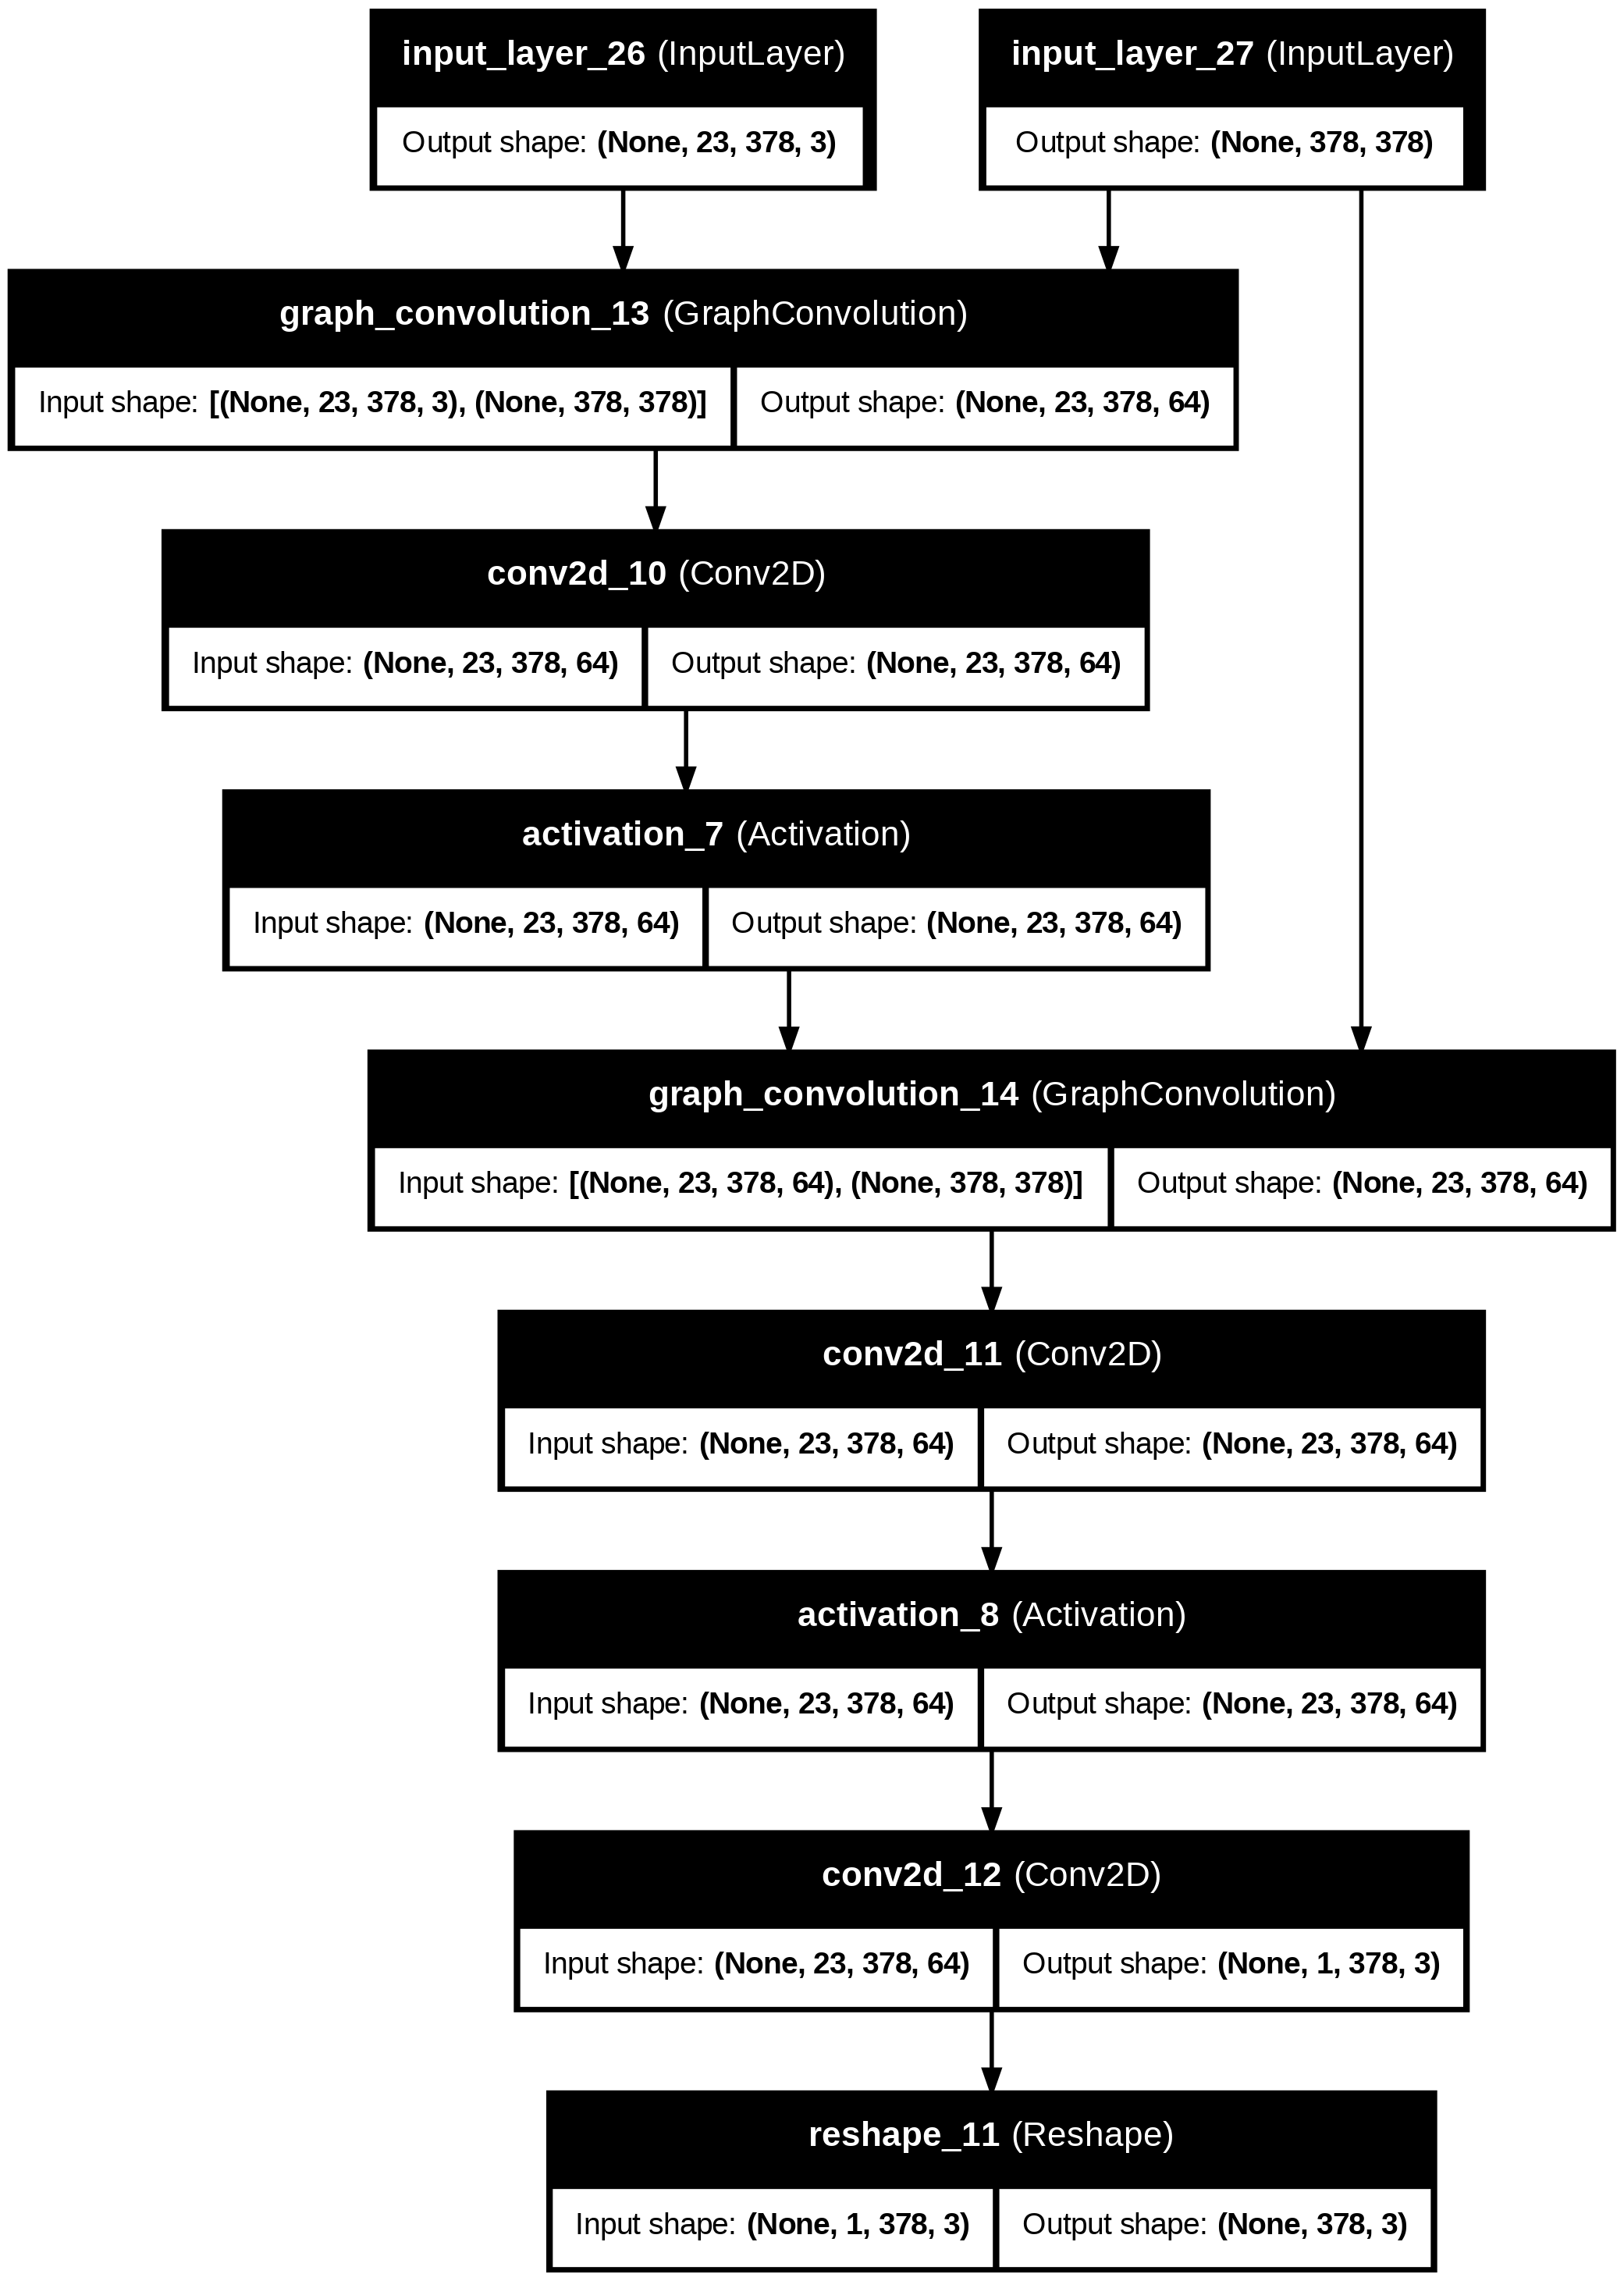

In [ ]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture
# show_shapes=True displays the input and output shapes of each layer
# show_layer_names=True displays the name of each layer
plot_model(st_gcn_model, show_shapes=True, show_layer_names=True)

/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


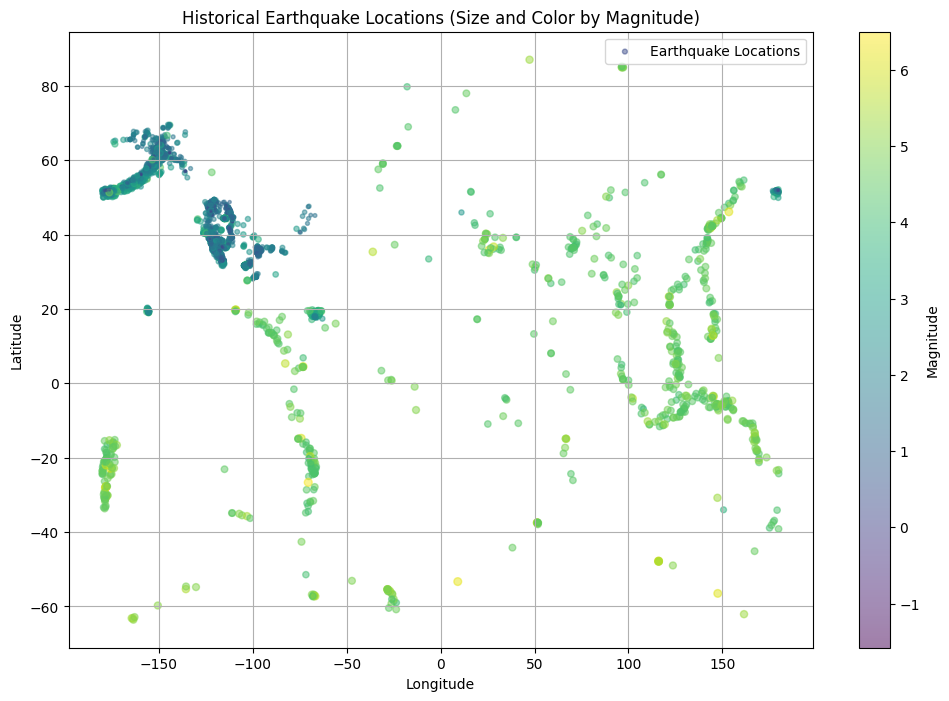

In [ ]:
import matplotlib.pyplot as plt

# Visualize historical earthquake locations
plt.figure(figsize=(12, 8))
plt.scatter(df_encoded['longitude'], df_encoded['latitude'], alpha=0.5, s=df_encoded['mag']*5, label='Earthquake Locations', c=df_encoded['mag'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Historical Earthquake Locations (Size and Color by Magnitude)')
plt.colorbar(label='Magnitude')
plt.grid(True)
plt.legend()
plt.show()

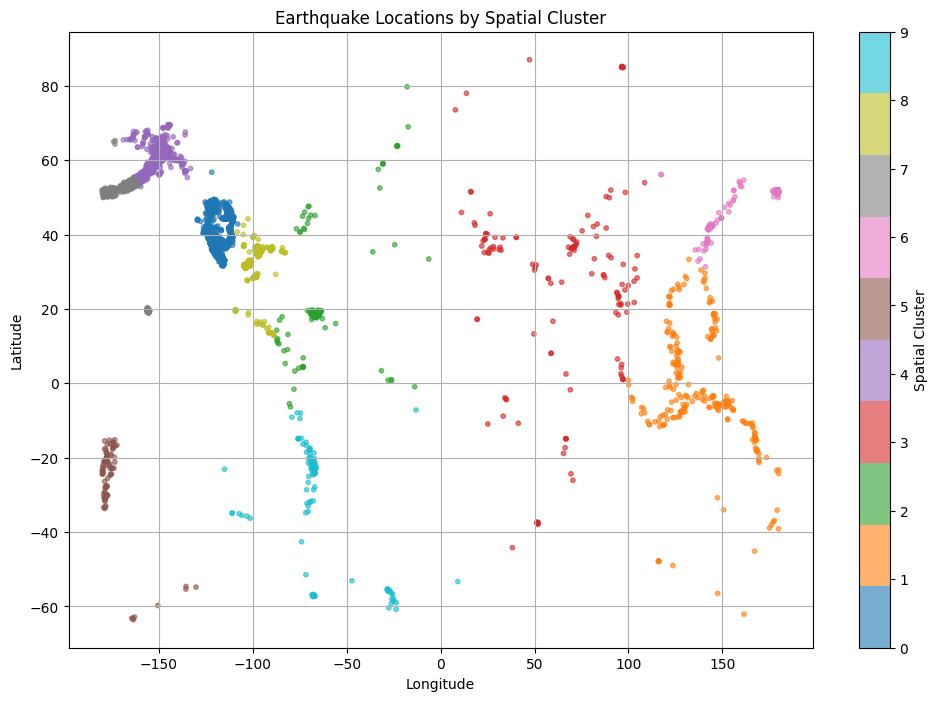

In [ ]:
import matplotlib.pyplot as plt

# Visualize earthquake locations colored by spatial cluster
plt.figure(figsize=(12, 8))
plt.scatter(df_encoded['longitude'], df_encoded['latitude'], c=df_encoded['spatial_cluster'], cmap='tab10', alpha=0.6, s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earthquake Locations by Spatial Cluster')
plt.colorbar(label='Spatial Cluster')
plt.grid(True)
plt.show()